In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib
import pylab
import matplotlib.pyplot as plt
import psrchive
import numpy as np

In [5]:
def cdm_ch_smearing(ldm,hdm,cdm,fc,bw,nchan):
    dmdif1=np.abs(hdm-cdm)
    dmdif2=np.abs(cdm-ldm)
    #print("new")
    #print(dmdif1)
    #print(dmdif2)
    fc_GHz=fc*1e-3
    if dmdif1>dmdif2:
        dmdif=dmdif1
    else:
        dmdif=dmdif2
    
    tsm_us=8.3*dmdif*bw/(nchan*fc_GHz**3)
    tsm_ms=tsm_us*1e-3
    return tsm_ms

def dm_step_smearing(dmstep,fc,bw,nchan):
    fc_GHz=fc*1e-3
    tsm_dm_us=8.3*(dmstep/2)*bw/(fc_GHz**3)
    tsm_dm_ms=tsm_dm_us*1e-3
    return tsm_dm_ms

In [128]:
a=cdm_ch_smearing(100,140,120,400,200,1024)
b=dm_step_smearing(0.01,400,200,1024)
print(a,"ms")
print(b,"ms")
#x=10**(-3)*8.3*(0.01/2)*(200.)*1./(0.4)**3
#print(x)

0.5065917968749999 ms
0.12968749999999998 ms


step 0.001


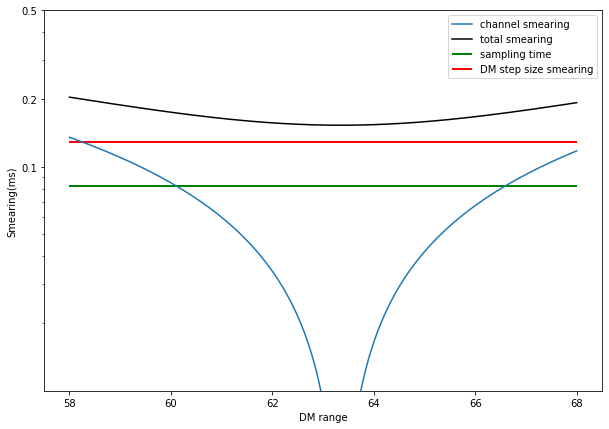

Max chan smearing (ms):  0.13551330566406253
Min chan smearing (ms):  2.532958984369096e-05
Min dm step size smearing (ms)  0.12968749999999998
Maximum total smearing (ms) 0.2046792370228393
Minimum total smearing (ms) 0.15339405039908857


In [191]:
ldm=58
hdm=68
cdm=63.35
fc=400  #MHz
bw=200  #MHz
nchan=1024
tsample=0.08192  #ms
dmstep=0.01
i=0
N=10000
step=(hdm-ldm)/N
print('step',step)
sm=[]
dmrange=[]
total_sm=[]

sm_dm_step=dm_step_smearing(dmstep,fc,bw,nchan)

while i<hdm:
    for i in range(0,N,1):
        
        dm=ldm+(step*i)
        dmrange.append(dm)
        sm.append(cdm_ch_smearing(dm,(dm+step),cdm,fc,bw,nchan))

for smvar in sm:
    total_sm.append(np.sqrt(smvar**2+sm_dm_step**2+tsample**2))
    
fig1, ax1 = plt.subplots(figsize=(10, 7))

ax1.set_yscale('log')
ax1.set_yticks([0.1,0.2,0.5])
ax1.set_ylim(0.01,0.5)
ax1.plot(dmrange,sm,label='channel smearing')
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.set_ylabel('Smearing(ms)')
ax1.set_xlabel('DM range')
ax1.hlines(y=tsample, xmin=ldm, xmax=hdm, linewidth=2, color='g', label='sampling time')
ax1.hlines(y=sm_dm_step, xmin=ldm, xmax=hdm, linewidth=2, color='r', label='DM step size smearing')
ax1.plot(dmrange,total_sm,color='black',label='total smearing')
plt.legend()
plt.savefig('dm_smearing_6652.png',dpi='figure', format='png',facecolor='white')

plt.show()

print('Max chan smearing (ms): ', max(sm))
print('Min chan smearing (ms): ', min(sm))
print('Min dm step size smearing (ms) ', sm_dm_step)
print('Maximum total smearing (ms)', max(total_sm))
print('Minimum total smearing (ms)', min(total_sm))



In [58]:
#At a DM of 63.483046 how much is the smearing in the profile?

#So, if I calculate tsm from all the three effects they are:

tsm_ch_6652b = cdm_ch_smearing(63.483046,64.483047,63.35,400,200,1024)
print('chan smearing in ms', tsm_ch_6652b)

tsm_dm_step_6652b = dm_step_smearing(0.01,400,200,1024)
print('dm step smearing in ms', tsm_dm_step_6652b)

tsample=81.92e-3
print('tsample', tsample)
tsm_total=np.sqrt(tsm_ch_6652b**2+tsm_dm_step_6652b**2+tsample**2)

print('total smearing in ngc6652b (ms): ', tsm_total)

#nbin=128--1.83ms
print('Number of bins in the profile with smearing: ',(128*tsm_total/1.8302))
print(tsm_total/1.8302)

chan smearing in ms 0.028699615783691342
dm step smearing in ms 0.12968749999999998
tsample 0.08192
total smearing in ngc6652b (ms):  0.15605576568131505
Number of bins in the profile with smearing:  10.914183153321126
0.0852670558853213


In [56]:
    
def plot_int_profile_nomove(filename,bin_move,name):
        filename=str(filename)
        arch = psrchive.Archive_load(filename)
        arch.dedisperse()
        arch.remove_baseline()
        data = arch.get_data()
        I=data[:,:,:,:].mean(0).mean(0).mean(0)
        shp=data.shape
        nbin=shp[3]
        max_int=np.argmax(I)
        I=np.roll(I,bin_move)
        fig = plt.figure(figsize=(5,5))

        plt.yticks([])
        plt.rc('font', size=15)          # controls default text sizes
        plt.rc('axes', titlesize=15)     # fontsize of the axes title
        plt.rc('axes', labelsize=15) 
        plt.tight_layout()
        plt.plot(np.arange(0,1,1./nbin),I,label=arch.get_centre_frequency(),linewidth=2.0,c='k')
        plt.errorbar(0.85,900, xerr=0.0859375,fmt='-',capsize=10,color='k')
        plt.xlabel('Pulse phase')
        plt.ylabel('Flux density (relative units)')
        srcname=arch.get_source()
        srcname=srcname.replace("_","J")
        plt.title(srcname)
        plt.legend()
        plt.savefig(str(arch.get_source())+'_werrorbar'+name+'.pdf',bbox_inches='tight') 

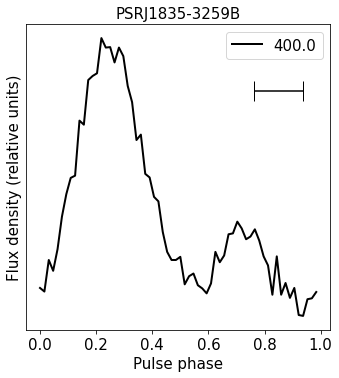

In [57]:
file_gmrt_400='~/work/GMRT/RE-TIMING-NGC6652B/archives_simpler/standard_timing2020_400.n64.std.chngdfreq'

plot_int_profile_nomove(file_gmrt_400,25,'GMRT_400')

